In [28]:
import pandas as pd
import numpy as np
import bluebelt as blue
from scipy.interpolate import UnivariateSpline

In [29]:
nrows = 100
ncols = 6

np.random.seed(27)
series = pd.Series(np.random.weibull(7,nrows) * 100, index=pd.date_range(start='1-1-2020', periods=nrows), name='process A')
series = pd.Series(np.random.weibull(7,nrows) * 100, index=pd.date_range(start='1-1-2020', periods=nrows), name='process A')
frame = pd.DataFrame(np.random.randint(100,200,ncols*nrows).reshape(nrows, ncols), index=pd.date_range(start='1-1-2020', periods=nrows), columns=[f'process {col}' for col in range(1, ncols+1)])

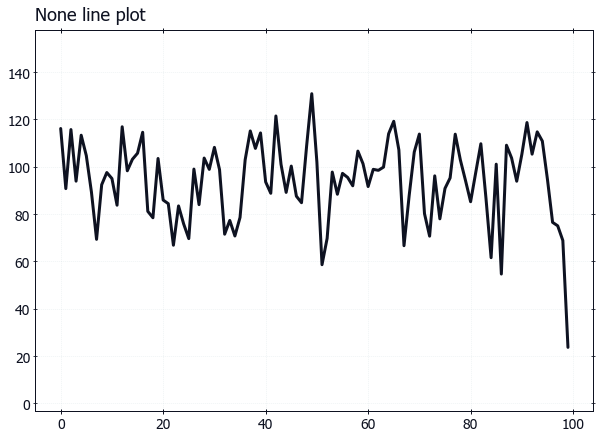

In [96]:
spl = UnivariateSpline(np.arange(0, series.index.size), series.values, k=3, s=0.1)

xnew = np.linspace(0, series.index.size, 100)
ynew = spl(xnew)
pd.Series(index=xnew, data=ynew).blue.line()


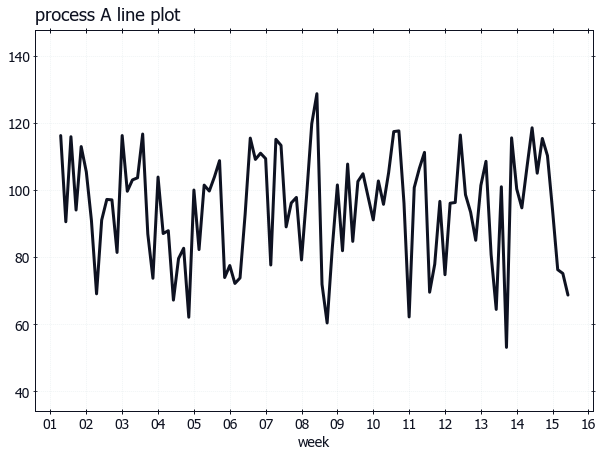

In [9]:
series.blue.line()

In [6]:
result = series.blue.index.groupby(level=['year', 'week']).subsize_count(count=[3,4])
result

3    4  optimum
2020 1   176  132      187
     2   210  157      187
     3   233  174      187
     4   190  142      187
     5   223  167      187
     6   217  162      187
     7   232  174      187
     8   213  160      187
     9   226  170      187
     10  241  181      187
     11  208  156      187
     12  220  165      187
     13  208  156      187
     14  250  187      187
     15  104   68      187

In [26]:
_dict = {}

#arr = self.grouped.values.T
for val in range(int(result.values.min()), int(result.values.max())):

    under = np.where(val < result.iloc[:,0:2].min(axis=1), result.iloc[:,0:2].min(axis=1) - val, 0)
    over = np.where(val > result.iloc[:,0:2].max(axis=1), val - result.iloc[:,0:2].max(axis=1), 0)
    _dict[val] = under + over

# get the keys with the most zeros
_o_dict = {key: len([x for x in value if x == 0]) for key, value in _dict.items()}
most_zeros = _o_dict.get(max(_o_dict, key=_o_dict.get))

_dict = {key: value for (key, value) in _dict.items() if _o_dict.get(key) == most_zeros}

# get the smallest sum
_o_dict = {key: sum(value) for (key, value) in _dict.items()}
min_val = _o_dict.get(min(_o_dict, key=_o_dict.get))
_dict = {key: value for (key, value) in _dict.items() if _o_dict.get(key) == min_val}

# build the optimum series and merge with result
optimum = tuple(_dict.keys()) if len(_dict.keys()) > 1 else list(_dict.keys())[0]
optimum = pd.Series(index=result.index, data=[optimum]*result.shape[0], name='optimum')

In [27]:
optimum

1     187
2     187
3     187
4     187
5     187
6     187
7     187
8     187
9     187
10    187
11    187
12    187
13    187
14    187
15    187
Name: optimum, dtype: int64

In [7]:
_dict = {key: sum(value) for (key, value) in d.items()}

min_val = _dict.get(math.min(_dict, key=_dict.get))

_dict = {key: value for (key, value) in _dict.items() if value == min_val}
_dict.keys()

AttributeError: module 'math' has no attribute 'min'

In [7]:
_dict = {key: len([x for x in value if x == 0]) for key, value in d.items()}
min_val = _dict.get(max(_dict, key=_dict.get))

max_key = max(_dict.items(), key=_dict.get)

min_val = _dict.get(max(_dict, key=_dict.get))
_dict = {key: value for (key, value) in _dict.items() if value == min_val}

# _dict = {key: sum(value) for (key, value) in d.items() if key in _dict.keys()}
# min_val = _dict.get(min(_dict, key=_dict.get))

# _dict = {key: value for (key, value) in _dict.items() if value == min_val}
optimum = tuple(_dict.keys()) if len(_dict.keys()) > 1 else list(_dict.keys())[0]
pd.Series(index=df.index, data=[optimum]*df.shape[0])

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

In [10]:
max(_dict, key=_dict.get)

187

In [4]:
frame.blue.data.group_index(level=['year', 'week','day'], iso=False).sum().index

/Users/Arvid/Projects/bluebelt_package/bluebelt/data/resolution.py:236: Warning: rule=['year', 'week', 'day'] is not possible when using iso=False; iso will be set to True
  warnings.warn(f'rule={self.level} is not possible when using iso=False; iso will be set to True', Warning)


AssertionError: Level year not in index

In [5]:
'week'[-1]

'k'

In [24]:
blue.core.index.IsoDatetimeMultiIndex.from_frame(index.index.to_frame(index=False))

IsoDatetimeMultiIndex([( 1, 3),
                       ( 1, 4),
                       ( 1, 5),
                       ( 1, 6),
                       ( 1, 7),
                       ( 2, 1),
                       ( 2, 2),
                       ( 2, 3),
                       ( 2, 4),
                       ( 2, 5),
                       ( 2, 6),
                       ( 2, 7),
                       ( 3, 1),
                       ( 3, 2),
                       ( 3, 3),
                       ( 3, 4),
                       ( 3, 5),
                       ( 3, 6),
                       ( 3, 7),
                       ( 4, 1),
                       ( 4, 2),
                       ( 4, 3),
                       ( 4, 4),
                       ( 4, 5),
                       ( 4, 6),
                       ( 4, 7),
                       ( 5, 1),
                       ( 5, 2),
                       ( 5, 3),
                       ( 5, 4),
                       ( 5, 5),
        

In [9]:
series.blue.to_idtmi().groupby(level='week').sum()

week
1     529.470987
2     631.834931
3     699.573173
4     570.028221
5     669.712228
6     651.612625
7     698.117146
8     640.702569
9     680.932692
10    725.528164
11    624.411244
12    660.255207
13    624.496493
14    750.699153
15    313.834305
Name: process A, dtype: float64

In [17]:
for i, name in enumerate(index.names):
    if index.get_level_values(name).unique().size > 1:
        levels = index.names[i:]
        break
        

In [18]:
levels

FrozenList(['week', 'day'])

In [16]:
index.get_level_values('week').unique().size

15

In [4]:
#i = series.blue.group_index(level='day', iso=False).sum().index.to_frame()
#index = i.iso_index.from_frame(i)

In [5]:
index = series.index.blue.to_doymi(level='day')

In [17]:
index.to_datetimeindex()

AttributeError: 'MultiIndex' object has no attribute 'to_datetimeindex'

In [74]:
pd.Index([datetime.datetime.fromisocalendar(*row) for row in index])

DatetimeIndex(['2019-12-30', '2020-01-06', '2020-01-13', '2020-01-20',
               '2020-01-27', '2020-02-03', '2020-02-10', '2020-02-17',
               '2020-02-24', '2020-03-02', '2020-03-09', '2020-03-16',
               '2020-03-23', '2020-03-30', '2020-04-06'],
              dtype='datetime64[ns]', freq=None)

In [75]:
series = series.blue.group_index(level='week').sum()

In [190]:
class IsoMultiIndex(pd.MultiIndex):
    def __new__(cls, *args, **kwargs):
        cls._obj = super(IsoMultiIndex, cls).__new__(cls, *args, **kwargs)
        return cls._obj
    
    def __init__(cls, iso=True, *args, **kwargs):
        print(kwargs)
        cls._obj._iso = iso


In [191]:
i = series.index.to_frame()

In [192]:
index = IsoMultiIndex.from_frame(i)

{'levels': [Int64Index([2020], dtype='int64'), Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')], 'codes': [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int8)], 'sortorder': None, 'names': ('year', 'week'), 'verify_integrity': False}


In [184]:
type(index)

__main__.IsoMultiIndex

In [163]:
series = pd.Series(index=index, data=series.values, name='iso')

In [175]:
series

year  week
2020  1       504.561295
      2       742.345025
      3       656.497207
      4       591.454222
      5       660.364760
      6       650.112669
      7       668.531651
      8       702.253510
      9       696.615769
      10      692.140989
      11      702.369105
      12      614.189005
      13      617.544696
      14      684.454244
      15      410.761859
Name: iso, dtype: float64

In [4]:
series.index.blue.dt_index().shape[0]

100

In [5]:
index = series.blue.data.group_index(level='week').sum().index
#index = series.index
_dict = index.to_frame(index=False).to_dict()

_default_dict ={
    'year': {key: datetime.datetime.now().year for key in range(index.size)},
    'week': {key: 1 for key in range(index.size)},
    'day': {key: 1 for key in range(index.size)},
}

# for level, data in _default_dict.items():
#    _dict[level] = _dict.get(level, _default_dict[level])
    
# pd.MultiIndex.from_frame(pd.DataFrame.from_dict(_dict)[_default_dict.keys()])

In [23]:
_dict = {'a':1, 'day':2}

In [24]:
any((key in _dict.keys()) for key in _default_dict.keys())

True

In [6]:
index.get_level_values(0)

Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
       2020, 2020, 2020],
      dtype='object', name='year')

In [ ]:
arr = []
if 'year' in index.names:
    arr.append([l[index.names.index(level)] for l in index])
else:
    arr.append([datetime.datetime.now().year for l in index])

#[tuple(j for j in x) for x in i]
#n=0
#[x[n] for x in i]
#pd.MultiIndex.from_frame(pd.DataFrame(_dict))
np.swapaxes(np.array(arr),0,1)

In [62]:
datetime.datetime(2021, 12, 10).timestamp()

1639090800.0

In [139]:
datetime.datetime.fromisocalendar(1971, 1, 4).timestamp()

32050800.0

In [140]:
datetime.datetime.now().year

2021

In [141]:
index = series.blue.data.group_index(level='week').sum().index



ValueError: 'day' is not in list

In [ ]:
[i[0].replace(k, header_replace[k]) for k in header_replace for i in cursor.description if k in i[0]]

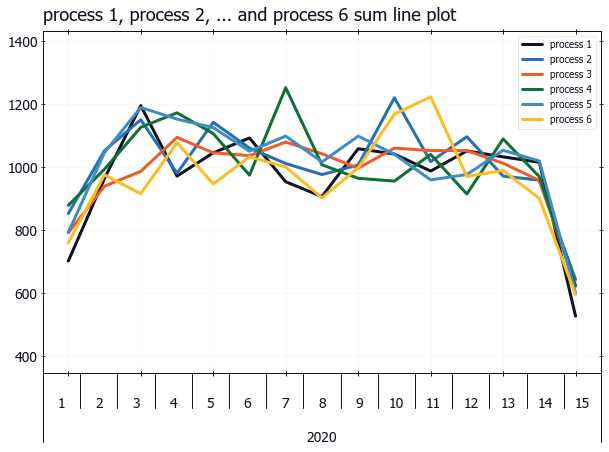

In [4]:
frame.blue.data.group_index().sum().blue.graph.line()

In [5]:
series.blue.group_index(level='week').sum()

year  week
2020  1       504.561295
      2       742.345025
      3       656.497207
      4       591.454222
      5       660.364760
      6       650.112669
      7       668.531651
      8       702.253510
      9       696.615769
      10      692.140989
      11      702.369105
      12      614.189005
      13      617.544696
      14      684.454244
      15      410.761859
Name: process A, dtype: float64

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import groupby

def test_table():
    data_table = pd.DataFrame({'Room':['Room A']*4 + ['Room B']*4,
                               'Shelf':(['Shelf 1']*2 + ['Shelf 2']*2)*2,
                               'Staple':['Milk','Water','Sugar','Honey','Wheat','Corn','Chicken','Cow'],
                               'Quantity':[10,20,5,6,4,7,2,1],
                               'Ordered':np.random.randint(0,10,8)
                               })
    return data_table

def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]
    
def label_group_bar_table(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos*scale, ypos)
            pos += rpos
        add_line(ax, pos*scale , ypos)
        ypos -= .1

df = frame[['process 1', 'process 2']].blue.data.group_index(level='week').sum()
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(kind='bar',stacked=True,ax=fig.gca())
#Below 3 lines remove default labels
labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_xlabel('')
label_group_bar_table(ax, df)
fig.subplots_adjust(bottom=.1*df.index.nlevels)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'name'

In [25]:
groupby(frame.blue.data.group_index(level='week').sum().index.get_level_values('week'))

In [39]:
label_len(frame.blue.data.group_index(level='week').sum().index,'week')

[(1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1)]

In [38]:
frame.blue.data.group_index(level='week').sum().groupby(level='year').count()

,0,1,2,3,4,5
year,,,,,,
2020,15,15,15,15,15,15
